In [57]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

extract_points (generic function with 1 method)

Download cities

In [23]:
download_city_with_bounds("Kraków","8")
download_city_with_bounds("Brno","8")
download_city_with_bounds("Gliwice","8")
#download_data("Cracow")
#download_data("Brno")
#download_data("Gliwice")

"The file is already downloaded"

In [24]:
#df_kraków = get_POI("Kraków.osm",nothing,"Kraków.csv")
df_cracow = get_POI("Kraków.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

Row,elemtype,elemid,nodeid,lat,lon,key,value,group,influence,range
,Symbol,Int64,Int64,Float64,Float64,String,String,Symbol,Float64,Float64
1,node,28898012,28898012,50.2874,18.6641,public_transport,stop_position,transport,5.0,300.0
2,node,29017182,29017182,50.2881,18.6603,public_transport,stop_position,transport,5.0,300.0
3,node,29092672,29092672,50.2783,18.6579,public_transport,stop_position,transport,5.0,300.0
4,node,198120498,198120498,50.2876,18.654,public_transport,stop_position,transport,5.0,300.0
5,node,198121009,198121009,50.2879,18.6545,public_transport,stop_position,transport,5.0,300.0
6,node,198122611,198122611,50.2969,18.6588,public_transport,stop_position,transport,5.0,300.0
7,node,198122619,198122619,50.2964,18.6571,public_transport,stop_position,transport,5.0,300.0
8,node,198122622,198122622,50.2965,18.6591,public_transport,stop_position,transport,5.0,300.0
9,node,198126072,198126072,50.3431,18.6511,public_transport,stop_position,transport,5.0,300.0


In [36]:
get_boundries_points("Kraków")
krakow_boundries = extract_points("Kraków")
get_boundries_points("Brno")
brno_boundries = extract_points("Brno")
get_boundries_points("Gliwice")
gliwice_boundries = extract_points("Gliwice")

1998-element Vector{Tuple{Float64, Float64}}:
 (50.2708327, 18.735831)
 (50.2709651, 18.7356255)
 (50.2709873, 18.7356191)
 (50.271003, 18.7355721)
 (50.2710172, 18.7355315)
 (50.2711162, 18.7353697)
 (50.2712326, 18.7348521)
 (50.2712341, 18.7348414)
 (50.2714559, 18.7342922)
 (50.2715236, 18.7342377)
 ⋮
 (50.2726973, 18.731022)
 (50.2724885, 18.7312149)
 (50.272496, 18.7312815)
 (50.2725131, 18.7313235)
 (50.272543, 18.7313531)
 (50.272619, 18.7313818)
 (50.2726791, 18.7314227)
 (50.2727128, 18.731588)
 (50.2727188, 18.7316757)

In [26]:
#center_kraków = LLA(50.061692315544654, 19.939496620660737)
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
#ix_kraków = AttractivenessSpatIndex(df_kraków,get_range=a->500)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->500)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->500)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->500)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
6453 element(s) in 2 level(s) (1, 65 node(s) per level):
 level=2 nchildren=65 mbr=((-9519.527017602295, -7682.9702167205105), (7604.619912362441, 10920.853106671395)), 6453×10 DataFrame
  Row │ elemtype  elemid     nodeid       lat      lon      key                ⋯
      │ Symbol    Int64      Int64        Float64  Float64  String             ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ node       28898012     28898012  50.2874  18.6641  public_transport   ⋯
    2 │ node       29017182     29017182  50.2881  18.6603  public_transport
    3 │ node       29092672     29092672  5

In [51]:
cracow_boundries_lats = [i[1] for i in krakow_boundries]
cracow_boundries_lons = [i[2] for i in krakow_boundries]
brno_boundries_lats = [i[1] for i in brno_boundries]
brno_boundries_lons = [i[2] for i in brno_boundries]
gliwice_boundries_lats = [i[1] for i in gliwice_boundries]
gliwice_boundries_lons = [i[2] for i in gliwice_boundries]
points_cracow = generate_sectors(200,50,center_cracow,360,
                                cracow_boundries_lats,cracow_boundries_lons)
points_brno = generate_sectors(200,50,center_brno,360,
                                brno_boundries_lats,brno_boundries_lons)
points_gliwice = generate_sectors(200,50,center_gliwice,360,
                                gliwice_boundries_lats,gliwice_boundries_lons)

200×360 Matrix{LLA}:
 LLA(50.2939, 18.6664, 0.000195594)  …  LLA(50.2939, 18.6664, 0.000195595)
 LLA(50.2939, 18.6671, 0.000782374)     LLA(50.2939, 18.6671, 0.000782373)
 LLA(50.2939, 18.6678, 0.00176034)      LLA(50.2939, 18.6678, 0.00176034)
 LLA(50.2939, 18.6685, 0.0031295)       LLA(50.2939, 18.6685, 0.00312949)
 LLA(50.2939, 18.6692, 0.00488984)      LLA(50.2939, 18.6692, 0.00488983)
 LLA(50.2939, 18.6699, 0.00704137)   …  LLA(50.2939, 18.6699, 0.00704136)
 LLA(50.2939, 18.6706, 0.00958408)      LLA(50.2939, 18.6706, 0.00958407)
 LLA(50.2939, 18.6713, 0.012518)        LLA(50.2939, 18.6713, 0.012518)
 LLA(50.294, 18.672, 0.0158431)         LLA(50.2939, 18.672, 0.0158431)
 LLA(50.294, 18.6727, 0.0195594)        LLA(50.2939, 18.6727, 0.0195593)
 ⋮                                   ⋱  
 LLA(0.0, 0.0, 0.0)                     LLA(0.0, 0.0, 0.0)
 LLA(0.0, 0.0, 0.0)                     LLA(0.0, 0.0, 0.0)
 LLA(0.0, 0.0, 0.0)                     LLA(0.0, 0.0, 0.0)
 LLA(0.0, 0.0, 0.0)     

In [58]:
attr = :shopping
#attr_kraków = calculate_attractiveness_of_sector(points_kraków,ix_kraków,attr)
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

200-element Vector{Float64}:
 621.6071051954774
 301.37731315191985
 189.62254953866375
 130.95452401964172
  94.58360661459336
  69.80276748681587
  51.86558296230831
  38.70743861080544
  29.139358823189795
  22.25773843821402
   ⋮
   0.0015992945716947695
   0.0020067734783960774
   0.0023198289231024754
   0.012626400563389682
   0.010261732789266915
   0.0066601790847416195
   0.0022524964506170247
   0.0
   0.0

In [59]:
#stand_kraków = min_max_scaling(attr_kraków)
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

200-element Vector{Float64}:
 1.0
 0.484835695462563
 0.3050520947295687
 0.21067089311738213
 0.15215979004108965
 0.11229403091340939
 0.08343788629314024
 0.06226994235954409
 0.04687745455230328
 0.035806763230633615
 ⋮
 2.572838306267168e-6
 3.2283631599819074e-6
 3.731985853625268e-6
 2.0312510037057966e-5
 1.6508390434243663e-5
 1.0714451345673061e-5
 3.6236658683440885e-6
 0.0
 0.0

In [60]:
x_axis = [i*50 for i in 1:200]./1000

200-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  ⋮
  9.6
  9.65
  9.7
  9.75
  9.8
  9.85
  9.9
  9.95
 10.0

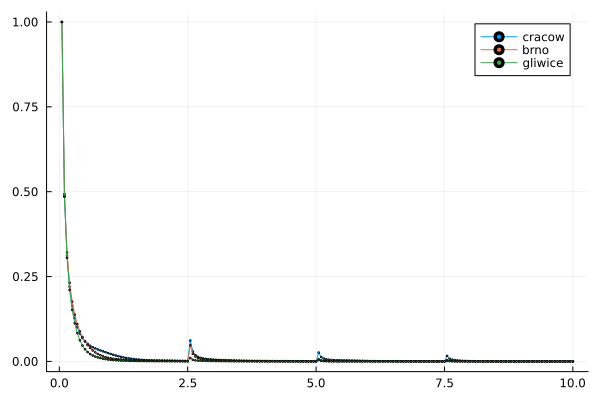

In [61]:
plotconfig = (marker=:circle, markersize=1)
cities = [stand_cracow, stand_brno,stand_gliwice]
labels = ["cracow" "brno" "gliwice"]
plot(x_axis,cities, labels = labels; plotconfig...)